In [102]:
from Utils.FS import file
from nltk.tokenize.punkt import PunktSentenceTokenizer
from nltk.tokenize import word_tokenize
from nltk.corpus import brown
from scipy.sparse import coo_matrix, dok_matrix
from scipy.sparse.linalg import svds
from sklearn.preprocessing import normalize
import numpy as np
import matplotlib.pyplot as plt


In [2]:
sents = brown.sents()
sents = [[token.lower() for token in sent] for sent in sents]
words = brown.words()
words = [word.lower() for word in words]

In [3]:
print("Number of tokens: {}".format(len(words)))
print("Number of sentences: {}".format(len(sents)))
print("Longest sentences length: {}".format(max([len(sent) for sent in sents])))

Number of tokens: 1161192
Number of sentences: 57340
Longest sentences length: 180


In [4]:
def words2dicts(words):
    f_dict = {}
    index = 0
    for word in words:
        if not word in f_dict.keys():
            f_dict[word] = index
            index = index + 1
        
    return f_dict, { v:k for k, v in f_dict.items()}

#def sents2wordContextMatrix(sents):
    

In [5]:
words_dict, inv_words_dict = words2dicts(words)
words_size = len(words_dict)
print("Number of unique tokens: {}".format(words_size))

Number of unique tokens: 49815


In [6]:
def sents2wordCoocurrenceMatrix(sents, words_dict, window_size = 10):
    #don't really care edge cases....

    window = []
    row = []
    col = []
    data = []
    for sent in sents:
        for word in sent:
            for i in range(len(window)- 1):
                for j in range(i+1, len(window)):
                    row += [words_dict[window[i]], words_dict[window[j]]]
                    col += [words_dict[window[j]], words_dict[window[i]]]
                    data += [1, 1]
            if len(window) == window_size:
                window.pop(0)
            window.append(word)
    print('Preparing sparse matrix...')
    print('Length of data: {}'.format(len(data)))
    return coo_matrix((data, (row,col)), shape=(words_size, words_size))

In [90]:
m = sents2wordCoocurrenceMatrix(sents, words_dict, 10)

Preparing sparse matrix...
Length of data: 104506620


In [91]:
m = m.astype('float')

In [92]:
norm_m = normalize(m, norm='l2', axis=1, copy=True, return_norm=False)

In [93]:
u, s, vt = svds(m, k=100)

In [99]:
u.shape

(49815, 100)

In [105]:
def plotVocabs(vocabs):
    vectors = np.array([ u[words_dict[vocab]] for vocab in vocabs])
    coo = coo_matrix(vectors)
    v, s, vt = svds(coo, k=2)
    x = [v[i][0] for i,vocab in enumerate(vocabs)]
    y = [v[i][1] for i,vocab in enumerate(vocabs)]
    return x, y


In [106]:
vocabs = ['man', 'woman', 'boy', 'girl', 'king', 'queen']
#x = [u[words_dict[vocab]][::-1][0] for vocab in vocabs]
#y = [u[words_dict[vocab]][::-1][1] for vocab in vocabs]
x, y = plotVocabs(vocabs)

[0.27937708073225043, -0.64015710167434248, -0.42511586301102011, -0.56882992323246062, -0.088197168251421931, -0.0088098184777123945]
[0.95964225050574081, 0.20075748107231897, 0.13250277225298943, 0.14558683406427436, 0.0047298674577809577, 0.0028813684284568764]


/home/hoiy927/project/tf_playground/tf_playground/lib/python3.5/site-packages/matplotlib/figure.py:402: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


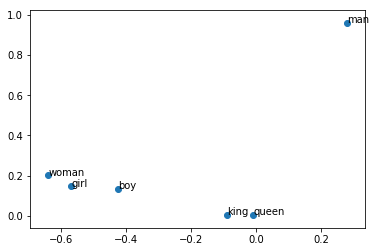

In [107]:
fig, ax = plt.subplots()
ax.scatter(x, y)

for i, name in enumerate(vocabs):
    ax.annotate(name, (x[i],y[i]))
fig.show()